In [71]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split


# Dataset

In [73]:
df  = pd.read_csv('data_titanic_proyecto.csv')
df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [75]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
df[df["Age"] < 1] = df[df["Age"] < 1] * 10

In [77]:

# Alternativa usando str.extract en lugar de apply + función
df['TicketPrefix_alt'] = df['Ticket'].str.extract(r'([A-Za-z./]+)', expand=False).str.strip().fillna("NoPrefix")
df['TicketPrefix_alt'] = df['TicketPrefix_alt'].str.replace(r'\W+', '_', regex=True).str.strip('_')
df.drop(columns=['Ticket'], inplace=True)

In [78]:
for col, val in df.isna().sum().items():
    if val > 0:
        print(f"Columna {col} tiene {val} valores faltantes. ({val/len(df)*100:.2f}%)")

Columna Age tiene 177 valores faltantes. (19.87%)
Columna Cabin tiene 687 valores faltantes. (77.10%)
Columna Embarked tiene 2 valores faltantes. (0.22%)


In [79]:
from sklearn.impute import KNNImputer

cols_for_knn = [col for col in df.columns if col != 'Cabin']

numeric_cols = df[cols_for_knn].select_dtypes(include=[np.number]).columns

imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

df = df.drop(columns=['Cabin', 'Name'])
df = df.dropna(axis=1)

In [80]:
df.head()

,PassengerId,Age,SibSp,Parch,Fare,passenger_class,passenger_sex,passenger_survived,TicketPrefix_alt
0,1.0,22.0,1.0,0.0,7.2500,Lower,M,N,A
1,2.0,38.0,1.0,0.0,71.2833,Upper,F,Y,PC
2,3.0,26.0,0.0,0.0,7.9250,Lower,F,Y,STON_O
3,4.0,35.0,1.0,0.0,53.1000,Upper,F,Y,NoPrefix
4,5.0,35.0,0.0,0.0,8.0500,Lower,M,N,NoPrefix


In [81]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,485.313131,29.782604,0.593715,0.472503,34.838888
std,569.224167,13.204739,1.536421,1.420586,71.372436
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,224.500000,21.700000,0.000000,0.000000,7.910400
50%,448.000000,29.000000,0.000000,0.000000,14.454200
75%,672.500000,36.550000,1.000000,0.000000,31.275000
max,8320.000000,80.000000,20.000000,20.000000,1515.500000


In [82]:
for col, val in df.isna().sum().items():
    if val > 0:
        print(f"Columna {col} tiene {val} valores faltantes. ({val/len(df)*100:.2f}%)")

In [83]:
df.head()

,PassengerId,Age,SibSp,Parch,Fare,passenger_class,passenger_sex,passenger_survived,TicketPrefix_alt
0,1.0,22.0,1.0,0.0,7.2500,Lower,M,N,A
1,2.0,38.0,1.0,0.0,71.2833,Upper,F,Y,PC
2,3.0,26.0,0.0,0.0,7.9250,Lower,F,Y,STON_O
3,4.0,35.0,1.0,0.0,53.1000,Upper,F,Y,NoPrefix
4,5.0,35.0,0.0,0.0,8.0500,Lower,M,N,NoPrefix


In [84]:
col_discretas = []
col_categoricas = []
col_continuas = []
for col in df.columns:
    if(df[col].dtype == 'object') or (df[col].dtype == 'category'):
        col_categoricas.append(col)
    else:
        if (df[col].nunique() < 20):
            col_discretas.append(col)
        else:
            col_continuas.append(col)

col_continuas.remove("PassengerId")
col_categoricas.remove("passenger_survived")

In [85]:
df["passenger_sex"] = df["passenger_sex"].str[0]

In [86]:
df.loc[df['passenger_class'].str.contains("Lower", case=False, na=False), 'passenger_class'] = "Lower"
df.loc[df['passenger_class'].str.contains("Middle", case=False, na=False), 'passenger_class'] = "Middle"
df.loc[df['passenger_class'].str.contains("Upper", case=False, na=False), 'passenger_class'] = "Upper"

In [87]:
df['passenger_survived'] = df['passenger_survived'].astype(str).str.strip().str[0].str.upper()
df['passenger_survived'] = df['passenger_survived'].replace({'Y': 1, 'N': 0})

C:\Users\PC\AppData\Local\Temp\ipykernel_31708\3585606886.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['passenger_survived'] = df['passenger_survived'].replace({'Y': 1, 'N': 0})


In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[col_continuas] = scaler.fit_transform(df[col_continuas])

In [89]:
df_encoded = pd.get_dummies(df, columns=col_categoricas, drop_first=False)

In [90]:
df_encoded.drop(columns=['PassengerId'], inplace=True)

In [91]:
df_encoded.head()   

,Age,SibSp,Parch,Fare,passenger_survived,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper,passenger_sex_F,passenger_sex_M,...,TicketPrefix_alt_S_C_A,TicketPrefix_alt_S_C_PARIS,TicketPrefix_alt_S_O_C,TicketPrefix_alt_S_O_P,TicketPrefix_alt_S_O_P_P,TicketPrefix_alt_S_P,TicketPrefix_alt_S_W_PP,TicketPrefix_alt_WE_P,TicketPrefix_alt_W_C,TicketPrefix_alt_W_E_P
0,0.265823,1.0,0.0,0.004784,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0.468354,1.0,0.0,0.047036,1,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.316456,0.0,0.0,0.005229,1,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0.430380,1.0,0.0,0.035038,1,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0.430380,0.0,0.0,0.005312,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df_encoded.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'passenger_survived',
       'passenger_class_Lower', 'passenger_class_Middle',
       'passenger_class_Upper', 'passenger_sex_F', 'passenger_sex_M',
       'TicketPrefix_alt_A', 'TicketPrefix_alt_A_S', 'TicketPrefix_alt_C',
       'TicketPrefix_alt_CA', 'TicketPrefix_alt_C_A',
       'TicketPrefix_alt_C_A_SOTON', 'TicketPrefix_alt_F_C',
       'TicketPrefix_alt_F_C_C', 'TicketPrefix_alt_Fa',
       'TicketPrefix_alt_LINE', 'TicketPrefix_alt_NoPrefix',
       'TicketPrefix_alt_PC', 'TicketPrefix_alt_PP', 'TicketPrefix_alt_P_PP',
       'TicketPrefix_alt_SC', 'TicketPrefix_alt_SCO_W',
       'TicketPrefix_alt_SC_AH', 'TicketPrefix_alt_SC_PARIS',
       'TicketPrefix_alt_SC_Paris', 'TicketPrefix_alt_SOTON_O',
       'TicketPrefix_alt_SOTON_OQ', 'TicketPrefix_alt_SOTON_O_Q',
       'TicketPrefix_alt_SO_C', 'TicketPrefix_alt_STON_O',
       'TicketPrefix_alt_SW_PP', 'TicketPrefix_alt_S_C_A',
       'TicketPrefix_alt_S_C_PARIS', 'TicketPrefix_alt_S_O_

# SPLIT

In [93]:
df_train, df_temp = train_test_split(df_encoded, test_size=0.4, random_state=42)
df_validate, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

df_test.to_csv('test.csv', index=False)

print(f"Train shape: {df_train.shape}")
print(f"Validate shape: {df_validate.shape}")
print(f"Test shape: {df_test.shape}")

Train shape: (534, 45)
Validate shape: (178, 45)
Test shape: (179, 45)


# Funciones

In [94]:

def sigmoid(z):
    z = np.asarray(z, dtype=np.float64)  # Asegura compatibilidad con np.exp
    return 1 / (1 + np.exp(-z))


def predict_logistic_regression(X, w, threshold=0.5):
    X = np.asarray(X, dtype=np.float64)
    
    X = np.c_[np.ones(X.shape[0]), X]
    
    w = np.asarray(w, dtype=np.float64)
    probs = sigmoid(X @ w)
    return (probs >= threshold).astype(int)

In [95]:
def load_naive_bayes_model(model_name):
    df = pd.read_csv(f"{model_name}_likelihoods.csv")
    
    clases = [col for col in df.columns if col not in ['feature', 'feature_value']]
    
    likelihoods = {}
    for feature, group in df.groupby('feature'):
        sub_df = group.set_index('feature_value')[clases]
        likelihoods[feature] = sub_df

    primer_feature = list(likelihoods.keys())[0]
    priors = likelihoods[primer_feature].sum().to_dict()
    total = sum(priors.values())
    priors = {k: v / total for k, v in priors.items()}

    return priors, likelihoods

def predict_naive_bayes(X, priors, likelihoods, laplace=1):
    clases = list(priors.keys())
    features = X.columns
    predictions = []

    for _, row in X.iterrows():
        log_posteriors = {}
        for cls in clases:
            log_prob = np.log(priors[cls])
            for feature in features:
                val = row[feature]
                tabla = likelihoods[feature]
                if val in tabla.index and cls in tabla.columns:
                    prob = tabla.at[val, cls]
                else:
                    # smoothing si el valor no fue visto
                    prob = laplace / (laplace * len(tabla.index))  # Denominador estimado
                log_prob += np.log(prob)
            log_posteriors[cls] = log_prob
        predictions.append(max(log_posteriors, key=log_posteriors.get))
    return pd.Series(predictions)


In [96]:
import joblib
import numpy as np
import pandas as pd

# Cargar modelos sklearn
bitacora = pd.read_csv('bitacora.csv')
mejores = bitacora.loc[bitacora.groupby('model')['accuracy'].idxmax()]


# Árbol de Decisión
modelo_arbol = joblib.load(mejores.loc[mejores['model'] == 'Decision Tree', 'model_file'].values[0])

# SVM
modelo_svm = joblib.load(mejores.loc[mejores['model'] == 'SVM', 'model_file'].values[0])

# Naive Bayes
priors, likelihoods = load_naive_bayes_model(mejores.loc[mejores['model'] == 'Naive Bayes Vectorized', 'model_file'].values[0])

# Regresión Logística
model_file = mejores.loc[mejores['model'] == 'Logistic Regression', 'model_file'].values[0]
w = np.load(f"{model_file}")


In [97]:
target = 'passenger_survived'
X_test = df_test.drop(columns=[target])
y_test = df_test[target]

In [105]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def predict_single(x, show_tree=True):
    # x debe ser un DataFrame de una sola fila, con las mismas columnas que X_test

    # Árbol de decisión
    dt_pred = modelo_arbol.predict(x)[0]
    dt_prob = modelo_arbol.predict_proba(x)[0]

    # Mostrar árbol y decisión
    if show_tree:
        plt.figure(figsize=(12,6))
        plot_tree(modelo_arbol, feature_names=x.columns, class_names=['No','Yes'], filled=True, max_depth=2)
        plt.title("Árbol de Decisión (primeros niveles)")
        plt.show()
        print(f"Árbol predice: {dt_pred} (Probabilidades: {dt_prob})")

    # SVM
    svm_pred = modelo_svm.predict(x)[0]
    svm_prob = modelo_svm.predict_proba(x)[0]

    # Regresión logística     
    x_np = np.c_[np.ones((1,)), x.values.astype(np.float64)]  
    reglog_w_vec = w.flatten()  
    reglog_prob = sigmoid(x_np @ reglog_w_vec)[0]
    reglog_pred = int(reglog_prob >= 0.5)
    
    # Naive Bayes para una sola observación
    bayes_pred = predict_naive_bayes(x, priors, likelihoods, laplace=1).iloc[0]
    # Probabilidad estimada para la clase predicha (si quieres mostrarla)
    clase_predicha = bayes_pred
    feature_vals = x.iloc[0]
    prob = np.log(priors[clase_predicha])
    for feature in x.columns:
        tabla = likelihoods[feature]
        val = feature_vals[feature]
        if val in tabla.index and clase_predicha in tabla.columns:
            prob += np.log(tabla.at[val, clase_predicha])
        else:
            prob += np.log(1e-9)
    bayes_prob = np.exp(prob)  # probabilidad (no normalizada, solo para referencia)

    # Ensemble (mayoría)
    preds = [int(dt_pred), int(svm_pred), int(reglog_pred), int(bayes_pred)]
    y_hat = int(np.round(np.mean(preds)))  # mayoría simple

    print(f"SVM predice: {svm_pred} (Probabilidades: {svm_prob})")
    print(f"Regresión logística predice: {reglog_pred} (Probabilidad: {reglog_prob:.3f})")
    print(f"Naive Bayes predice: {bayes_pred} (Probabilidades: {bayes_prob})")
    print(f"Predicción combinada (mayoría): {y_hat}")

    return {
        'arbol': (dt_pred, dt_prob),
        'svm': (svm_pred, svm_prob),
        'reglog': (reglog_pred, reglog_prob),
        'bayes': (bayes_pred, bayes_prob),
        'ensemble': y_hat
    }


--- Observación 1 ---


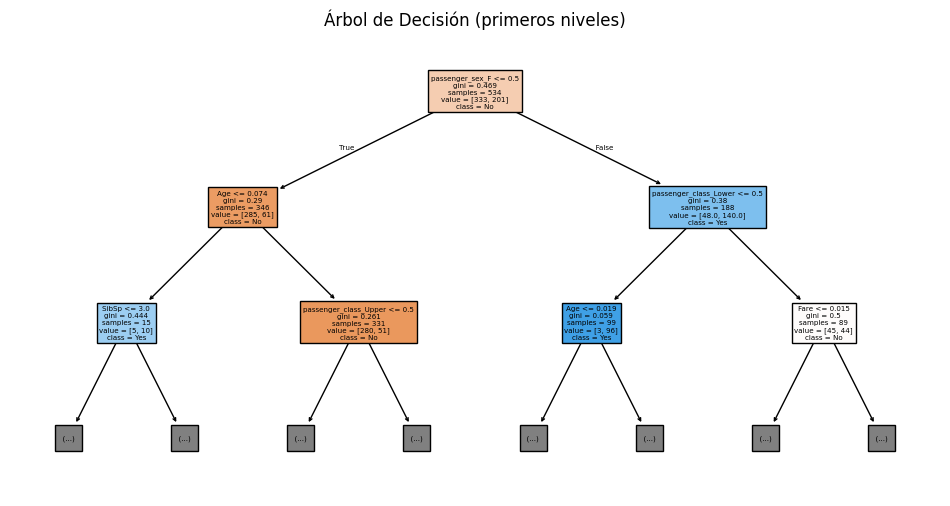

Árbol predice: 0 (Probabilidades: [0.89494163 0.10505837])
SVM predice: 0 (Probabilidades: [0.84637336 0.15362664])
Regresión logística predice: 0 (Probabilidad: 0.272)
Naive Bayes predice: 1 (Probabilidades: 0.0)
Predicción combinada (mayoría): 0

--- Observación 2 ---


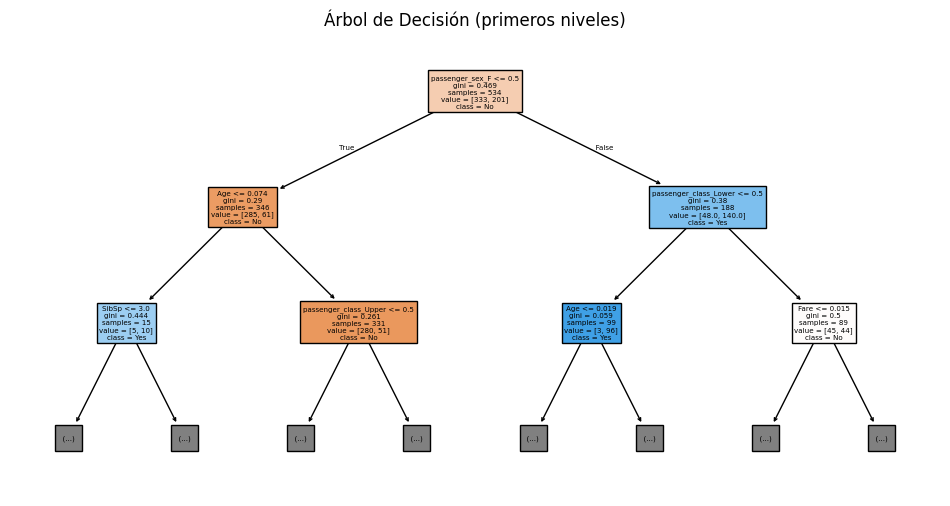

Árbol predice: 0 (Probabilidades: [0.89494163 0.10505837])
SVM predice: 0 (Probabilidades: [0.83638854 0.16361146])
Regresión logística predice: 0 (Probabilidad: 0.250)
Naive Bayes predice: 0 (Probabilidades: 0.0)
Predicción combinada (mayoría): 0

--- Observación 3 ---


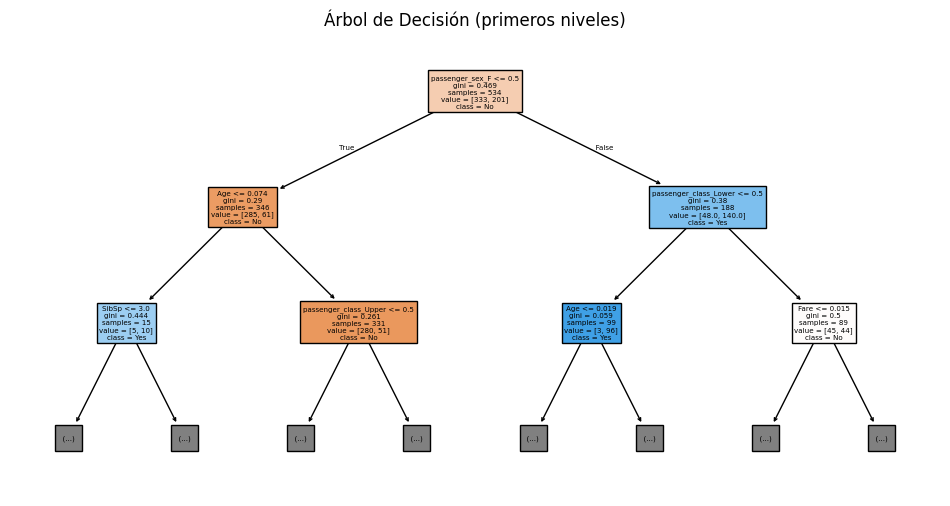

Árbol predice: 0 (Probabilidades: [0.89494163 0.10505837])
SVM predice: 0 (Probabilidades: [0.83889856 0.16110144])
Regresión logística predice: 0 (Probabilidad: 0.249)
Naive Bayes predice: 0 (Probabilidades: 0.0)
Predicción combinada (mayoría): 0

--- Observación 4 ---


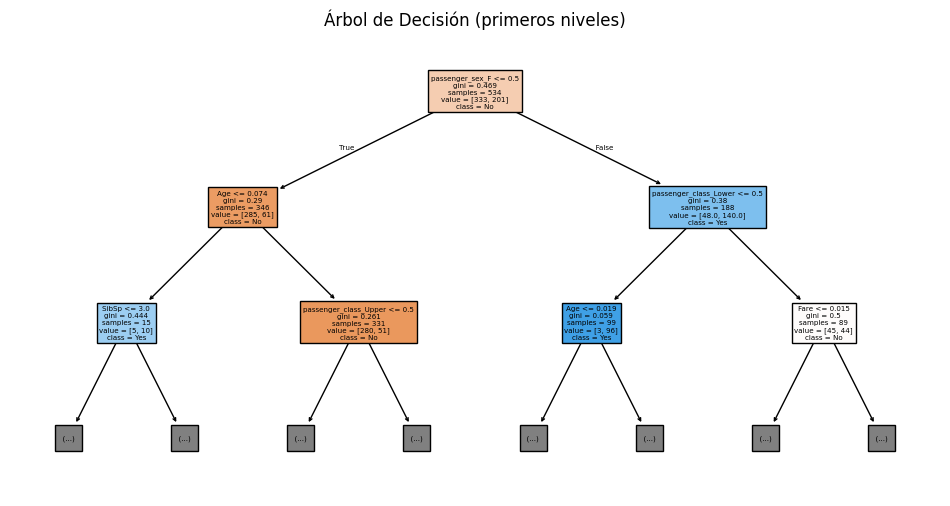

Árbol predice: 1 (Probabilidades: [0.38461538 0.61538462])
SVM predice: 1 (Probabilidades: [0.23485352 0.76514648])
Regresión logística predice: 0 (Probabilidad: 0.483)
Naive Bayes predice: 1 (Probabilidades: 0.0)
Predicción combinada (mayoría): 1

--- Observación 5 ---


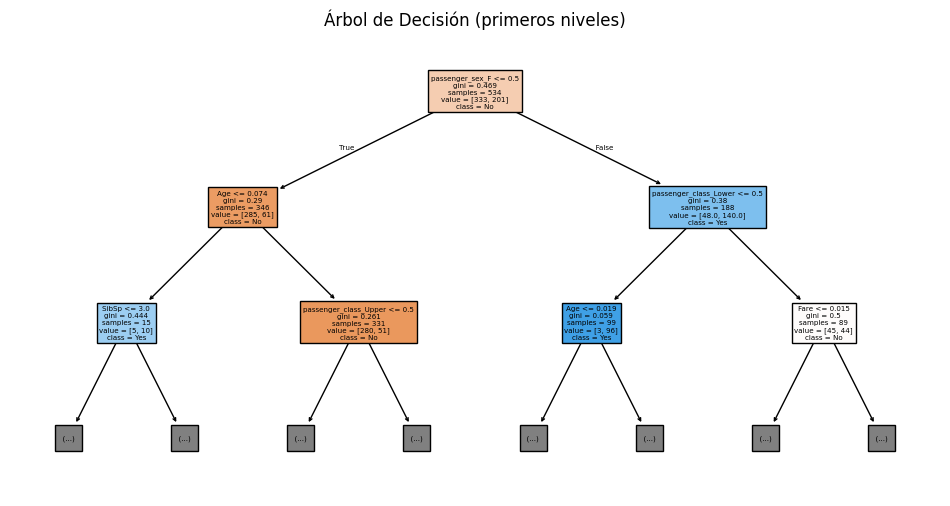

Árbol predice: 0 (Probabilidades: [0.89494163 0.10505837])
SVM predice: 0 (Probabilidades: [0.8367397 0.1632603])
Regresión logística predice: 0 (Probabilidad: 0.341)
Naive Bayes predice: 0 (Probabilidades: 0.0)
Predicción combinada (mayoría): 0

--- Observación 6 ---


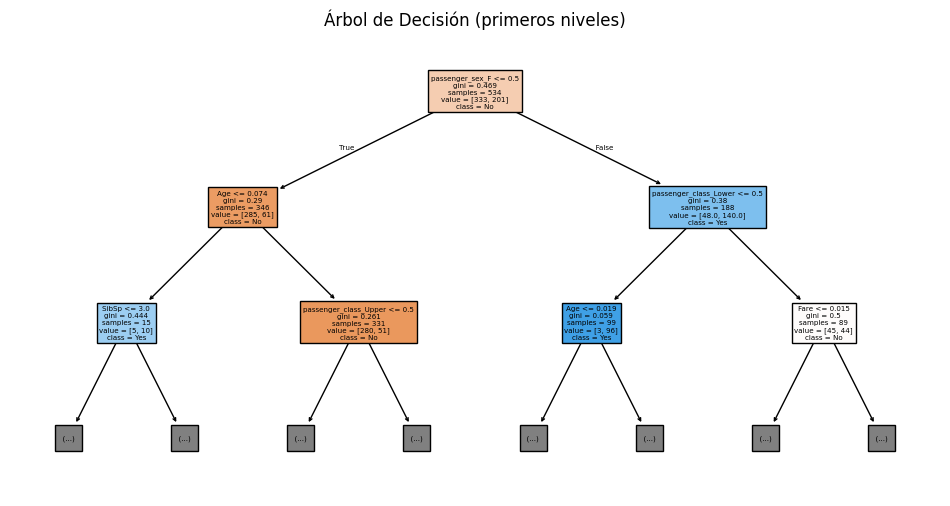

Árbol predice: 0 (Probabilidades: [0.71875 0.28125])
SVM predice: 0 (Probabilidades: [0.83587422 0.16412578])
Regresión logística predice: 0 (Probabilidad: 0.348)
Naive Bayes predice: 0 (Probabilidades: 0.0)
Predicción combinada (mayoría): 0

--- Observación 7 ---


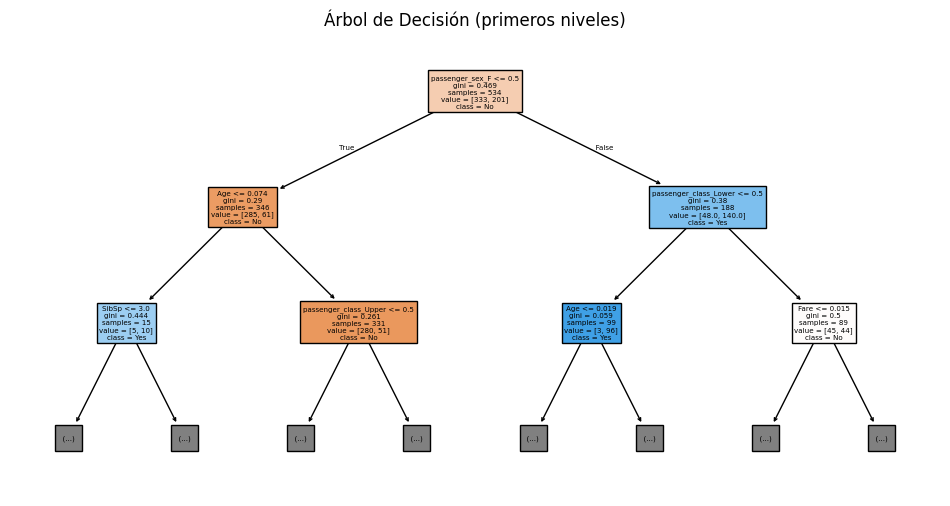

Árbol predice: 1 (Probabilidades: [0.01162791 0.98837209])
SVM predice: 1 (Probabilidades: [0.16947732 0.83052268])
Regresión logística predice: 1 (Probabilidad: 0.635)
Naive Bayes predice: 1 (Probabilidades: 0.0)
Predicción combinada (mayoría): 1

--- Observación 8 ---


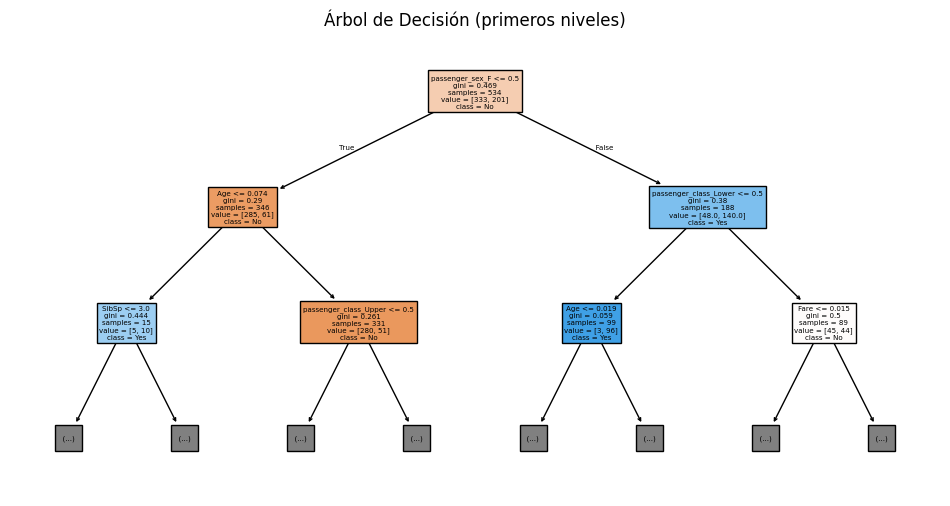

Árbol predice: 1 (Probabilidades: [0.09090909 0.90909091])
SVM predice: 1 (Probabilidades: [0.17381004 0.82618996])
Regresión logística predice: 1 (Probabilidad: 0.632)
Naive Bayes predice: 1 (Probabilidades: 0.0)
Predicción combinada (mayoría): 1

--- Observación 9 ---


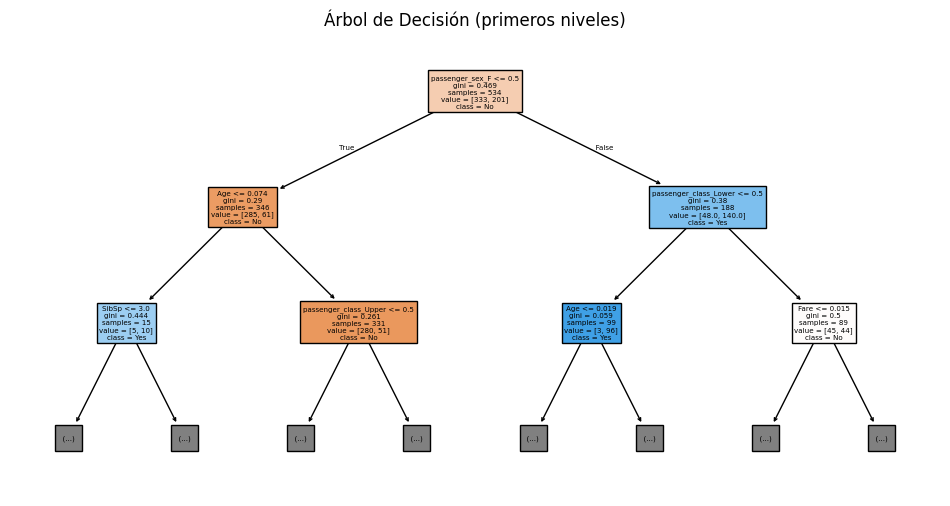

Árbol predice: 0 (Probabilidades: [0.89494163 0.10505837])
SVM predice: 0 (Probabilidades: [0.83781345 0.16218655])
Regresión logística predice: 0 (Probabilidad: 0.250)
Naive Bayes predice: 0 (Probabilidades: 0.0)
Predicción combinada (mayoría): 0

--- Observación 10 ---


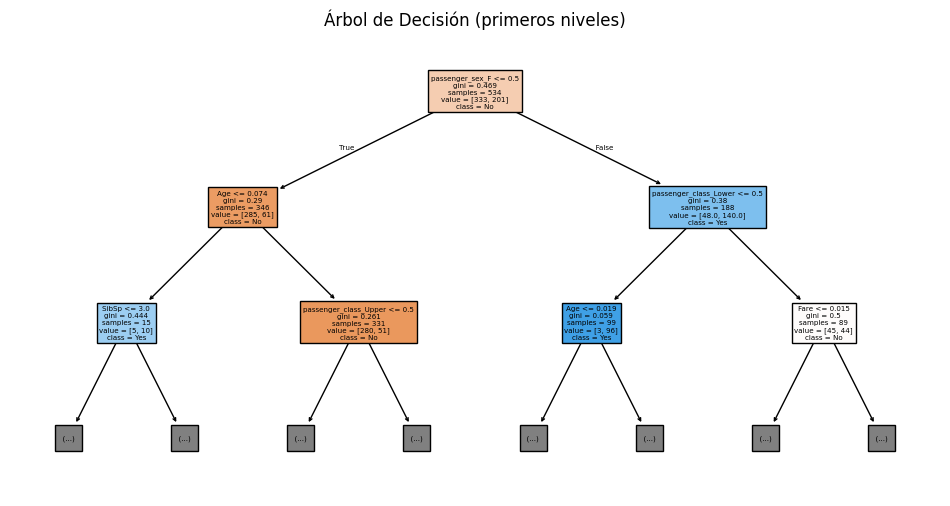

Árbol predice: 0 (Probabilidades: [0.89494163 0.10505837])
SVM predice: 0 (Probabilidades: [0.83737731 0.16262269])
Regresión logística predice: 0 (Probabilidad: 0.250)
Naive Bayes predice: 0 (Probabilidades: 0.0)
Predicción combinada (mayoría): 0


In [106]:
# Selecciona 10 observaciones del test o inventadas
for i in range(10):
    x = X_test.iloc[[i]]  # una sola fila, formato DataFrame
    print(f"\n--- Observación {i+1} ---")
    predict_single(x)